In [1]:
import pandas as pd
from datetime import date

In [2]:
X_train = pd.read_csv('./Regis_X_train.csv')
X_test = pd.read_csv('./Regis_X_test.csv')

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939210 entries, 0 to 939209
Data columns (total 28 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   ORDER_DATE                                 939210 non-null  object 
 1   CUSTOMER_ID                                939210 non-null  int64  
 2   SHOP                                       939210 non-null  object 
 3   CART_VALUE                                 939210 non-null  float64
 4   NR_ITEMS                                   939210 non-null  float64
 5   NR_ITEMS_UNIQUE                            939210 non-null  float64
 6   GENDER                                     939210 non-null  object 
 7   AGE                                        939210 non-null  float64
 8   STREET                                     939210 non-null  object 
 9   ZIP                                        939210 non-null  int64  
 10  CITY    

### historical data

In [4]:
X_train[['CART_VALUE', 'NR_ITEMS', 'CREATED', 'DUNNING_1', 'DUNNING_2', 'DUNNING_3', 'DUNNING_5'] ]

,CART_VALUE,NR_ITEMS,CREATED,DUNNING_1,DUNNING_2,DUNNING_3,DUNNING_5
0,25.94,1.0,0.0,0.0,0.0,0.0,0.0
1,74.97,3.0,1.0,0.0,0.0,0.0,0.0
2,29.94,1.0,0.0,0.0,0.0,0.0,0.0
3,57.98,1.0,0.0,0.0,0.0,0.0,0.0
4,60.98,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
939205,67.64,1.0,0.0,0.0,0.0,0.0,0.0
939206,190.90,4.0,1.0,0.0,0.0,0.0,0.0
939207,33.94,1.0,0.0,0.0,0.0,0.0,0.0
939208,29.90,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Num of idnvoices paid prior to creation date

In [6]:
X_train.shape

(939210, 28)

In [7]:
X_test.shape

(234874, 28)

(array([ 19037.,  72200., 104986., 117204., 189291., 181893., 129691.,
         75959.,  44137.,   4812.]),
 array([15., 23., 31., 39., 47., 55., 63., 71., 79., 87., 95.]),
 <BarContainer object of 10 artists>)

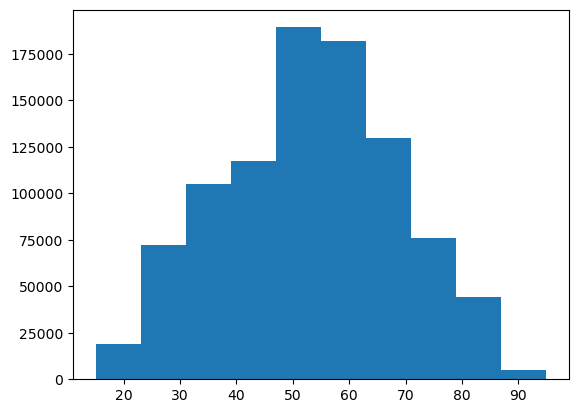

In [8]:
from matplotlib import pyplot as plt
plt.hist(X_train.AGE)

In [9]:
X_train.columns

Index(['ORDER_DATE', 'CUSTOMER_ID', 'SHOP', 'CART_VALUE', 'NR_ITEMS',
       'NR_ITEMS_UNIQUE', 'GENDER', 'AGE', 'STREET', 'ZIP', 'CITY',
       'STREET_ID', 'CANCELLED', 'CLOSED', 'CREATED', 'DUNNING_1', 'DUNNING_2',
       'DUNNING_3', 'DUNNING_4', 'DUNNING_5', 'INKASSO_CLOSED',
       'INKASSO_PENDING', 'PAID_FULL', 'PAID_OVER', 'REMINDER_1', 'REMINDER_2',
       'TRANSACTION_CREDIT_COLLECTION_IN_PROGRESS', 'TARGET'],
      dtype='object')

In [10]:
X_test

,ORDER_DATE,CUSTOMER_ID,SHOP,CART_VALUE,NR_ITEMS,NR_ITEMS_UNIQUE,GENDER,AGE,STREET,ZIP,...,DUNNING_4,DUNNING_5,INKASSO_CLOSED,INKASSO_PENDING,PAID_FULL,PAID_OVER,REMINDER_1,REMINDER_2,TRANSACTION_CREDIT_COLLECTION_IN_PROGRESS,TARGET
0,2017-07-04,16149387,Sports,28.94,1.0,1.0,f,53.0,Bahnstr.,46147,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,2018-10-19,23075071,Fashion,35.94,1.0,1.0,f,59.0,Albstr.,73262,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,2018-12-19,26993445,Jewellery,158.74,2.0,2.0,m,40.0,Schepmannskamp,45529,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
3,2018-11-14,17349545,Fashion,45.94,1.0,1.0,f,58.0,Schmackweg,26723,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,2020-06-13,31624705,Sports,12.90,1.0,1.0,m,51.0,Taubestr.,4347,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234869,2019-01-29,16942578,Fashion,40.94,1.0,1.0,f,63.0,Klingestr.,8451,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
234870,2018-06-26,15574612,Fashion,20.94,1.0,1.0,f,70.0,Höllgrabenweg,37281,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
234871,2020-07-24,15685098,Fashion,25.94,1.0,1.0,f,85.0,Detmolder Str.,33604,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
234872,2019-01-31,28121228,Fashion,50.98,1.0,1.0,f,70.0,Oberhauser Str.,45359,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [11]:
columnsToDrop = ['CUSTOMER_ID','PAID_FULL','ORDER_DATE', 'CUSTOMER_ID', 'STREET', 'ZIP', 'CITY', 'STREET_ID']

In [12]:


X_train.drop(columnsToDrop, axis=1, inplace=True)
X_test.drop(columnsToDrop, axis=1, inplace=True)


In [13]:
X_train.columns

Index(['SHOP', 'CART_VALUE', 'NR_ITEMS', 'NR_ITEMS_UNIQUE', 'GENDER', 'AGE',
       'CANCELLED', 'CLOSED', 'CREATED', 'DUNNING_1', 'DUNNING_2', 'DUNNING_3',
       'DUNNING_4', 'DUNNING_5', 'INKASSO_CLOSED', 'INKASSO_PENDING',
       'PAID_OVER', 'REMINDER_1', 'REMINDER_2',
       'TRANSACTION_CREDIT_COLLECTION_IN_PROGRESS', 'TARGET'],
      dtype='object')

In [14]:
dateDiffColumns = ['CANCELLED', 'CLOSED',
       'CREATED', 'DUNNING_1', 'DUNNING_2', 'DUNNING_3', 'DUNNING_4',
       'DUNNING_5', 'INKASSO_CLOSED', 'INKASSO_PENDING', 'PAID_OVER',
       'REMINDER_1', 'REMINDER_2', 'TRANSACTION_CREDIT_COLLECTION_IN_PROGRESS']

(array([ 19037.,  72200., 104986., 117204., 189291., 181893., 129691.,
         75959.,  44137.,   4812.]),
 array([15., 23., 31., 39., 47., 55., 63., 71., 79., 87., 95.]),
 <BarContainer object of 10 artists>)

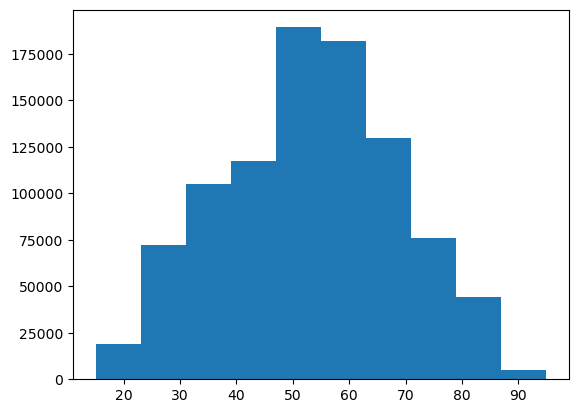

In [15]:
from matplotlib import pyplot as plt

plt.hist(X_train.AGE)

#### changing types

In [16]:
X_train.columns

Index(['SHOP', 'CART_VALUE', 'NR_ITEMS', 'NR_ITEMS_UNIQUE', 'GENDER', 'AGE',
       'CANCELLED', 'CLOSED', 'CREATED', 'DUNNING_1', 'DUNNING_2', 'DUNNING_3',
       'DUNNING_4', 'DUNNING_5', 'INKASSO_CLOSED', 'INKASSO_PENDING',
       'PAID_OVER', 'REMINDER_1', 'REMINDER_2',
       'TRANSACTION_CREDIT_COLLECTION_IN_PROGRESS', 'TARGET'],
      dtype='object')

In [17]:
X_train[['SHOP', 'GENDER']] = X_train[['SHOP', 'GENDER']].astype('category')
X_test[['SHOP', 'GENDER']] = X_test[['SHOP', 'GENDER']].astype('category')

(array([ 19037.,  72200., 104986., 117204., 189291., 181893., 129691.,
         75959.,  44137.,   4812.]),
 array([15., 23., 31., 39., 47., 55., 63., 71., 79., 87., 95.]),
 <BarContainer object of 10 artists>)

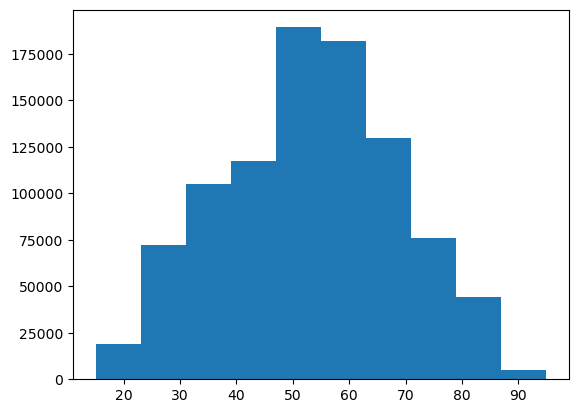

In [18]:
from matplotlib import pyplot as plt

plt.hist(X_train.AGE)

### Dropping Categories with too many values or Constant Values

### ONE-HOT ENCODING

In [19]:
X_train = pd.get_dummies(X_train, columns=['GENDER', 'SHOP'])
X_test = pd.get_dummies(X_test, columns=['GENDER', 'SHOP'])

In [20]:
y_train = X_train.pop('TARGET')
y_test = X_test.pop('TARGET')

In [21]:
len(X_train.columns)

34

In [22]:
X_train.columns

Index(['CART_VALUE', 'NR_ITEMS', 'NR_ITEMS_UNIQUE', 'AGE', 'CANCELLED',
       'CLOSED', 'CREATED', 'DUNNING_1', 'DUNNING_2', 'DUNNING_3', 'DUNNING_4',
       'DUNNING_5', 'INKASSO_CLOSED', 'INKASSO_PENDING', 'PAID_OVER',
       'REMINDER_1', 'REMINDER_2', 'TRANSACTION_CREDIT_COLLECTION_IN_PROGRESS',
       'GENDER_f', 'GENDER_m', 'GENDER_u', 'SHOP_Baby & Child',
       'SHOP_Car Accessories', 'SHOP_DIY Superstore & Tools',
       'SHOP_Electronics', 'SHOP_Fashion', 'SHOP_Food', 'SHOP_Furniture',
       'SHOP_Jewellery', 'SHOP_Media', 'SHOP_Shoes', 'SHOP_Sports',
       'SHOP_Toys', 'SHOP_Young Fashion'],
      dtype='object')

(array([ 19037.,  72200., 104986., 117204., 189291., 181893., 129691.,
         75959.,  44137.,   4812.]),
 array([15., 23., 31., 39., 47., 55., 63., 71., 79., 87., 95.]),
 <BarContainer object of 10 artists>)

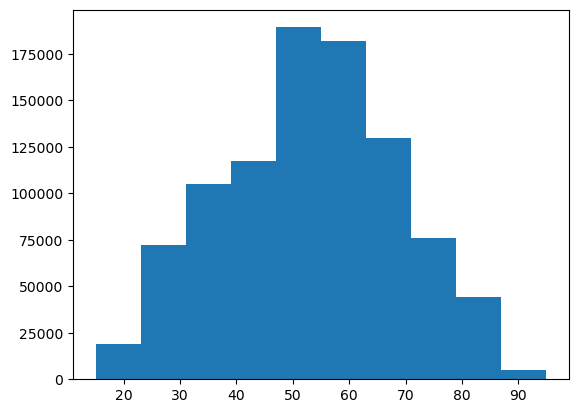

In [23]:
from matplotlib import pyplot as plt

plt.hist(X_train.AGE)

In [24]:
y_train

0         2
1         2
2         1
3         2
4         1
         ..
939205    1
939206    1
939207    1
939208    2
939209    1
Name: TARGET, Length: 939210, dtype: int64

[Text(0, 0, 'On Time'), Text(1, 0, 'Acceptable'), Text(2, 0, 'Late')]

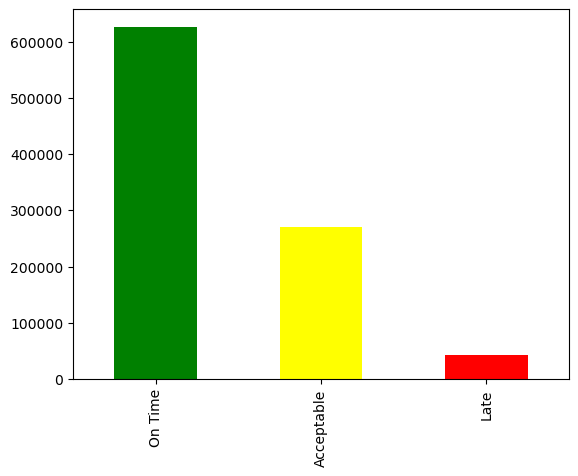

In [25]:
y_train.value_counts().plot.bar(color=['green', 'yellow', 'red']).set_xticklabels(['On Time', 'Acceptable', 'Late'])

### Balancing DataSet

#### Using RandomUnderSampler

In [26]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled_rus, y_resampled_us = rus.fit_resample(X_train, y_train)

[Text(0, 0, 'On Time'), Text(1, 0, 'Acceptable'), Text(2, 0, 'Late')]

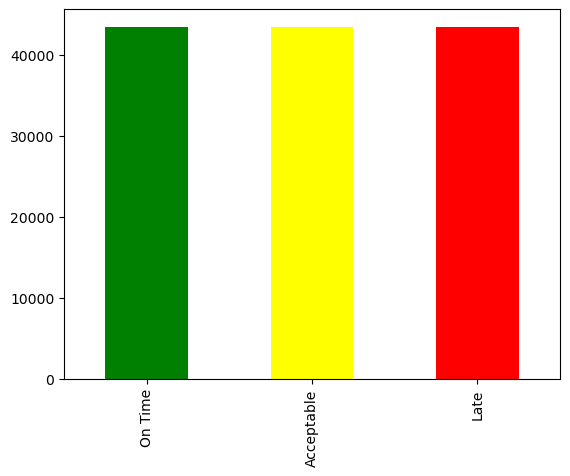

In [27]:
y_resampled_us.value_counts().plot.bar(color=['green', 'yellow', 'red']).set_xticklabels(['On Time', 'Acceptable', 'Late'])

#### Using NearMiss

In [28]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(n_neighbors=3, n_jobs=-1, version=3)
X_resampled_rus, y_resampled_us = nm.fit_resample(X_train, y_train)

### OverSampling

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_resampled_rus, y_resampled_us = sm.fit_resample(X_train, y_train)

### Testing Feature importance

In [ ]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_resampled_rus)

# define the multinomial logistic regression model
rfe = RFE(LogisticRegression(multi_class='multinomial', solver='lbfgs'), verbose=1)
rfe.fit(X_train_std, y_resampled_us)  # apply scaling on training data


Fitting estimator with 34 features.


Fitting estimator with 18 features.


### Feature Selection and Model

In [ ]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

# define the multinomial logistic regression model
rfe = RFE(LogisticRegression(multi_class='multinomial', solver='lbfgs'), verbose=1)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_resampled_rus, y_resampled_us)  # apply scaling on training data
pipe.score(X_test, y_test)


### Confusion Matrix

In [ ]:
plt.hist(y_test)

In [ ]:
y_train.value_counts()

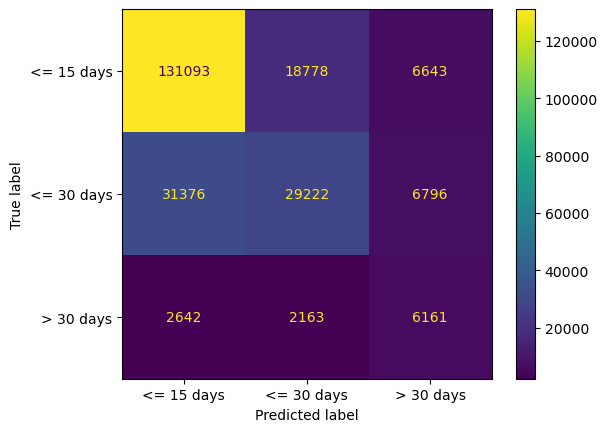

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = pipe.predict(X_test)
confusion_matrix(y_test, y_pred)

disp = plot_confusion_matrix(estimator=pipe, X=X_test, y_true=y_test, display_labels=['<= 15 days', '<= 30 days', '> 30 days'])  

In [ ]:
len(y_test) 

### Classification Report

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.84      0.82    156514
           2       0.58      0.43      0.50     67394
           3       0.31      0.56      0.40     10966

    accuracy                           0.71    234874
   macro avg       0.56      0.61      0.57    234874
weighted avg       0.71      0.71      0.70    234874



In [ ]:
pd.unique(y_pred)

In [ ]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(rfe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print(n_scores)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)

### Computing AUC ( Area under the curve)

In [44]:
from sklearn.metrics import roc_auc_score
y_pred_prob = pipe.predict_proba(X_test)
roc_auc_score(y_test,y_pred_prob, multi_class='ovr')

0.7800681748552433

### Computing ROC Curve

In [48]:
from sklearn.metrics import roc_curve
y_pred_prob = pipe.predict_proba(X_test)
fpr , tpr, thresholds = roc_curve(y_test,y_pred_prob, pos_label='your_label')

ValueError: y should be a 1d array, got an array of shape (234874, 3) instead.

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

In [ ]:
data_mean, data_std  = X_train.mean(), X_train.std()
data_z_scores = ((X_train - data_mean) / data_std).abs()
maskz = data_z_scores < 3
X_train = X_train.mask(~maskz)